<a href="https://colab.research.google.com/github/matchbou/renom/blob/master/install_renom_macrun%2BTutorial-201907101812.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://qiita.com/hokonin/items/73b61906dd2d5c7d8ccb

# Google Colaboratory で ReNom 環境を構築する

# [Installation](http://renom.jp/renomdl/ja/rsts/installation/main.html)

ReNomを使用するための準備として, 以下のステップを実行してください.
1. Python2.7もしくはPython3.4をインストール.
1. ReNomをインストール

最初にPythonをインストールする必要があります.ここではPythonをインストールする方法については説明しません.ReNomは以下のリンク(github)よりダウンロードすることができます.

URL: https://github.com/ReNom-dev-team/ReNom

Cuda ToolkitやcuDNNをインストールし, GPUを使用するための環境が整っている場合, 以下のコマンドを実行することでReNomをインストールできます.

```
git clone https://github.com/ReNom-dev-team/ReNom.git
cd ReNom
python setup.py build_ext -f -i
pip install -e .
```
CPU環境のみで実行する場合, 以下のコマンドを実行してください
```
git clone https://github.com/ReNom-dev-team/ReNom.git
cd ReNom
pip install -e .
```
**Requirements**

ReNom では以下のライブラリが必要です.
* Linux / Ubuntu
* Python 2.7, 3.4
* Numpy 1.13.0, 1.12.1 http://www.numpy.org/
* cuDNN 5.1 https://developer.nvidia.com/cudnn
* CUDA ToolKit 8.0 https://developer.nvidia.com/cuda-toolkit
* bottle 0.12.13 https://bottlepy.org/docs/dev/
* matplotlib 2.0.2 https://matplotlib.org
* networkx 1.11 https://networkx.github.io
* pandas 0.20.3 http://pandas.pydata.org
* scikit-learn 0.18.2 http://scikit-learn.org/stable/
* scipy https://www.scipy.org

In [2]:
# Google Colab でインストールされているパッケージの確認
# cuda, cuDNN は最初からインストール済だが、pip で確認できないのでインストールディレクトリを確認する
!python --version
!pip freeze | grep -E ^\(numpy\|bottle\|matplotlib\|networkx\|pandas\|scikit-learn\|scipy\)=
!ls -1 /usr/lib/x86_64-linux-gnu/libcuda*
!ls -1 /usr/lib64-nvidia/libcudnn*

Python 3.6.8
matplotlib==3.0.3
networkx==2.3
numpy==1.16.4
pandas==0.24.2
scikit-learn==0.21.2
scipy==1.3.0
/usr/lib/x86_64-linux-gnu/libcuda.so
/usr/lib/x86_64-linux-gnu/libcuda.so.1
/usr/lib/x86_64-linux-gnu/libcuda.so.418.67
ls: cannot access '/usr/lib64-nvidia/libcudnn*': No such file or directory


In [3]:
# 足りない分を追加インストールする
# Requirements に載っていないが、GPU使用時の setup.py の実行に cython が必要
!pip install bottle
!pip install cython

     |████████████████████████████████| 92kB 4.2MB/s 


In [4]:
# CUDA と cuDNN をインストールする。参考：https://qiita.com/yukoba/items/3692f1cb677b2383c983
#
# CUDA Toolkit 8.0 GA2 のインストール
# 元々入っている /usr/lib/x86_64-linux-gnu/libcudart.so.8.0.61 のバージョンに合わせている
%cd /content/
!apt-key adv --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
#!dpkg -i cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
!apt install ./cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
!apt update
!apt install cuda-8.0
!rm cuda-repo-ubuntu1604_8.0.61-1_amd64.deb

/content
Executing: /tmp/apt-key-gpghome.PTP7hoA0Yy/gpg.1.sh --fetch-keys http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub
gpg: requesting key from 'http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/7fa2af80.pub'
gpg: key F60F4B3D7FA2AF80: "cudatools <cudatools@nvidia.com>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
--2019-07-10 07:42:10--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 192.229.211.70, 2606:2800:21f:3aa:dcf:37b:1ed6:1fb
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|192.229.211.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2690 (2.6K) [application/x-deb]
Saving to: ‘cuda-repo-ubuntu1604_8.0.61-1_amd64.deb’

cuda-repo-ubuntu160 100%[===================>]   2.63K  --.-KB/s    in 0

In [5]:
# cuDNN 6.0.21 のインストール
%cd /content/
!wget http://developer.download.nvidia.com/compute/redist/cudnn/v6.0/cudnn-8.0-linux-x64-v6.0.tgz
!tar xzf cudnn-8.0-linux-x64-v6.0.tgz
!rm cudnn-8.0-linux-x64-v6.0.tgz
!cp -a cuda/lib64/* /usr/local/cuda/lib64/
!cp -a cuda/include/* /usr/local/cuda/include/
!ldconfig

/content
--2019-07-10 07:44:23--  http://developer.download.nvidia.com/compute/redist/cudnn/v6.0/cudnn-8.0-linux-x64-v6.0.tgz
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 192.229.211.70, 2606:2800:21f:3aa:dcf:37b:1ed6:1fb
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|192.229.211.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201134139 (192M) [application/x-compressed]
Saving to: ‘cudnn-8.0-linux-x64-v6.0.tgz’

cudnn-8.0-linux-x64 100%[===================>] 191.82M   228MB/s    in 0.8s    

2019-07-10 07:44:24 (228 MB/s) - ‘cudnn-8.0-linux-x64-v6.0.tgz’ saved [201134139/201134139]



In [6]:
# nvcc のある /usr/local/cuda/bin に PATH を通す
import os
os.environ["PATH"] = f'/usr/local/cuda/bin:{os.environ["PATH"]}'
os.environ["LD_LIBRARY_PATH"] = f'/usr/local/cuda/lib64:{os.environ["LD_LIBRARY_PATH"]}'
!env | grep PATH

LD_LIBRARY_PATH=/usr/local/cuda/lib64:/usr/lib64-nvidia
LIBRARY_PATH=/usr/local/cuda/lib64/stubs
PYTHONPATH=/env/python
PATH=/usr/local/cuda/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin


In [7]:
# デフォルトの gcc/g++ は 7.2.0 だが、nvcc が 6 以降に対応していないため 5 をインストールする
!apt install gcc-5 g++-5
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cpp-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0 libstdc++-5-dev
Suggested packages:
  gcc-5-locales g++-5-multilib gcc-5-doc libstdc++6-5-dbg gcc-5-multilib
  libgcc1-dbg libgomp1-dbg libitm1-dbg libatomic1-dbg libasan2-dbg
  liblsan0-dbg libtsan0-dbg libubsan0-dbg libcilkrts5-dbg libmpx0-dbg
  libquadmath0-dbg libstdc++-5-doc
The following NEW packages will be installed:
  cpp-5 g++-5 gcc-5 gcc-5-base libasan2 libgcc-5-dev libisl15 libmpx0
  libstdc++-5-dev
0 upgraded, 9 newly installed, 0 to remove and 43 not upgraded.
Need to get 29.1 MB of archives.
After this operation, 100 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 gcc-5-base amd64 

In [8]:
# ReNom を github から取得
%cd /content/
!git clone https://github.com/ReNom-dev-team/ReNom.git
%cd ReNom
# GPU を使う場合の setup.py 実行
!python setup.py build_ext -f -i
# インストール
!pip install -e .

/content
Cloning into 'ReNom'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 32504 (delta 0), reused 1 (delta 0), pack-reused 32501
Receiving objects: 100% (32504/32504), 28.72 MiB | 25.98 MiB/s, done.
Resolving deltas: 100% (9501/9501), done.
/content/ReNom
running build_ext
building 'cuda_misc_a' library
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/renom
creating build/temp.linux-x86_64-3.6/renom/cuda
creating build/temp.linux-x86_64-3.6/renom/cuda/thrust
nvcc --device-c -c --compiler-options -pthread,-DNDEBUG,-g,-fwrapv,-O2,-Wall,-g,-fstack-protector-strong,-Wformat,-Werror=format-security,-Wdate-time,-D_FORTIFY_SOURCE=2,-fPIC -arch=sm_30 -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c renom/cuda/thrust/thrust_funcs_float.cu -o build/temp.linux-x86_64-3.6/renom/cuda/thrust/thrust_funcs_float.o
nvcc --d

# [ソースコードからのReNomTDAのインストール](http://renom.jp/ja/notebooks/tda-2.1.0/how-to-install-with-source/notebook.html)

ソースコードからReNomTDAのインストールするチュートリアル

ReNomTDAには2種類のインストール方法があります.

このチュートリアルではソースコードからインストールする方法を説明します.

**Requirements**

ReNomTDAを使うにはReNomのインストールが必要です.

ReNomをまだインストールしていない場合はインストールを行ってください.

ReNomのインストール方法は http://renom.jp/rsts/renomdl/installation/main.html から参照できます.

**ソースコードからのインストール**
ReNomTDAは次のコマンドでインストールすることができます.
```
git clone https://github.com/ReNom-dev-team/ReNomTDA.git
cd ReNomTDA
pip install -e .
```
**ReNomTDAウェブアプリの起動**

インストールしたらrenom_tda コマンドが使用できます.

このコマンドでReNomTDAのウェブアプリケーションを起動することができます.

または次のコマンドでもアプリケーションの起動が可能です.
```
cd ReNomTDA/renom_tda/server/
python server.py
```

In [9]:
# ReNomTDA を github から取得し、インストール
%cd /content/
!git clone https://github.com/ReNom-dev-team/ReNomTDA.git
%cd ReNomTDA
!pip install -e .

/content
Cloning into 'ReNomTDA'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 1425 (delta 22), reused 42 (delta 17), pack-reused 1366
Receiving objects: 100% (1425/1425), 3.68 MiB | 16.09 MiB/s, done.
Resolving deltas: 100% (746/746), done.
/content/ReNomTDA
Obtaining file:///content/ReNomTDA
  Running setup.py develop for renom-tda


# [ReNom TDAの使い方](http://renom.jp/ja/notebooks/tda-2.1.0/how-to-use-ReNomTDA/notebook.html)（動作確認）

created 69 nodes.
created 188 edges.


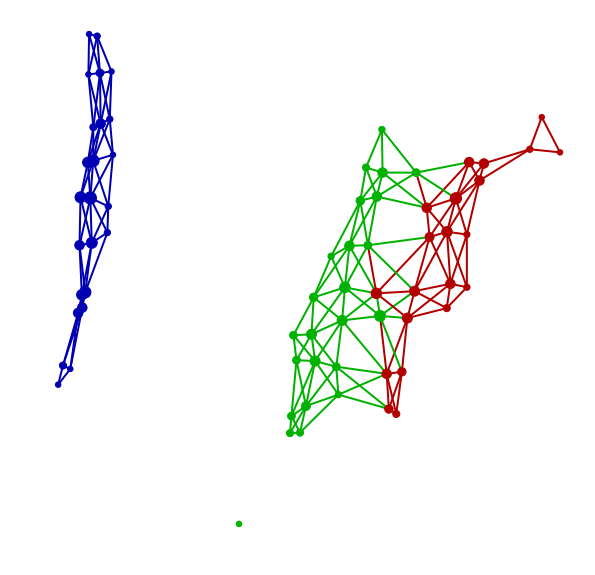

In [10]:
# 必要なモジュール
from sklearn.datasets import load_iris
from renom_tda.topology import Topology
from renom_tda.lens import PCA
# データのインポート
iris = load_iris()
data = iris.data
target = iris.target
# インスタンス作成
topology = Topology()
# データのロード
topology.load_data(data)
# ポイントクラウドの作成
metric = None
lens = [PCA(components=[0, 1])]
topology.fit_transform(metric=metric, lens=lens)
# 位相空間へマッピング
topology.map(resolution=15, overlap=0.5, eps=0.1, min_samples=3)
# トポロジーの色付け
topology.color(target, color_method="mode", color_type="rgb")
# トポロジーの表示
topology.show(fig_size=(10, 10), node_size=10, edge_width=2)

created 69 nodes.
created 188 edges.


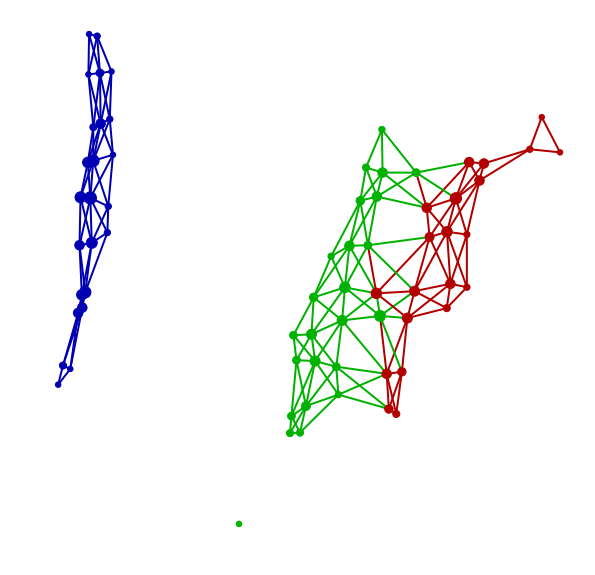

In [11]:
#トポロジーの保存
# https://www.renom.jp/ja/notebooks/product/renom_tda/how-to-save-topology/notebook.html

from sklearn.datasets import load_iris

from renom_tda.topology import Topology
from renom_tda.lens import PCA

iris = load_iris()

data = iris.data
target = iris.target


topology = Topology()


topology.load_data(data)


metric = None
lens = [PCA(components=[0, 1])]
topology.fit_transform(metric=metric, lens=lens)


topology.map(resolution=15, overlap=0.5, eps=0.1, min_samples=3)


topology.color(target, color_method="mode", color_type="rgb")


topology.save("出力ファイル..png", fig_size=(10, 10), node_size=10, edge_width=2)




['sepal length' 'sepal width' 'petal length' 'petal width']
(150, 4)
['species']
(150, 1)
created 69 nodes.
created 188 edges.


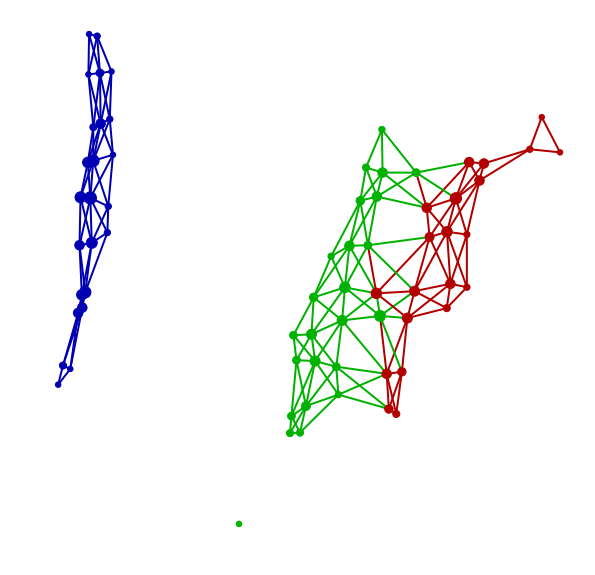

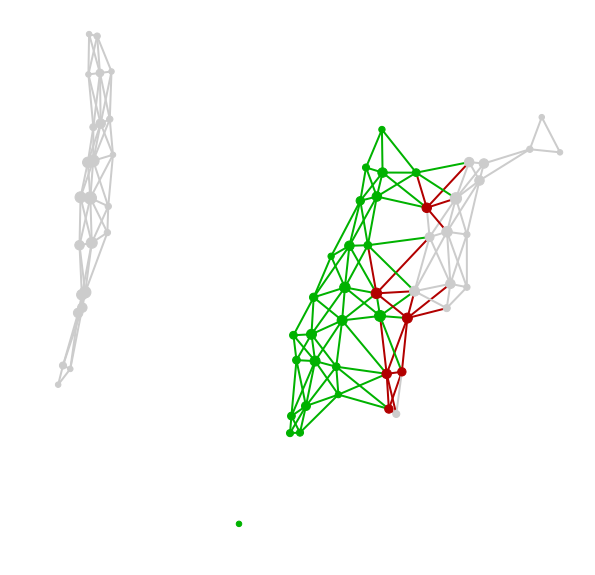

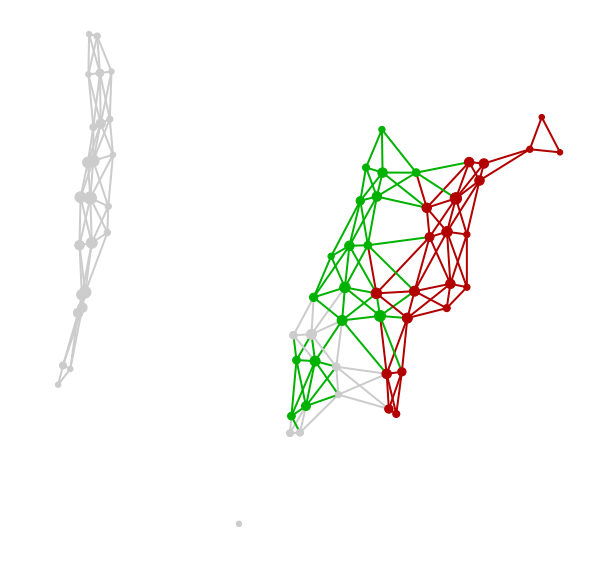

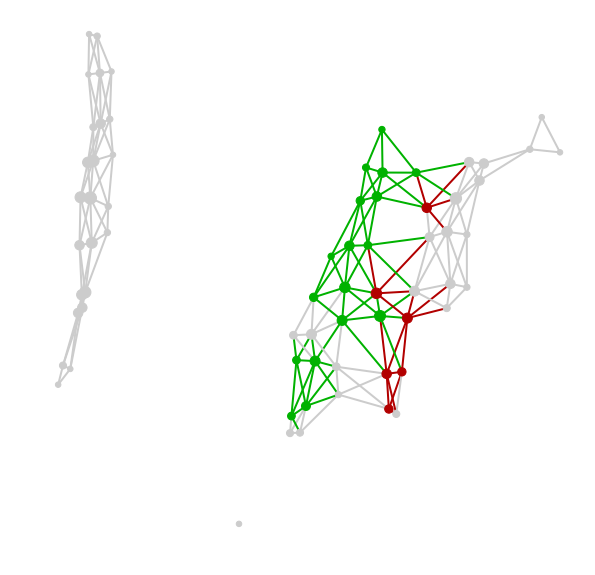

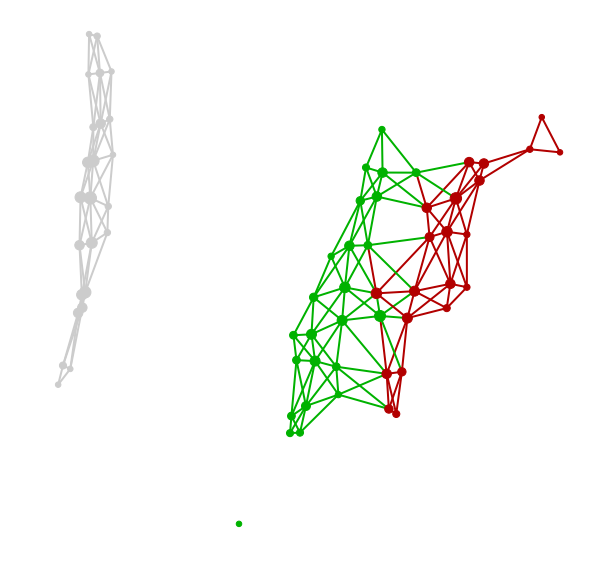

array([0, 0, 0])

In [21]:
#データの検索

#https://www.renom.jp/ja/notebooks/product/renom_tda/search-data/notebook.html


import numpy as np

from sklearn.datasets import load_iris

from renom_tda.topology import Topology
from renom_tda.lens import PCA




iris = load_iris()

data = iris.data
target = iris.target



setosa = ["setosa"] * 50
versicolor = ["versicolor"] * 50
versinica = ["versinica"] * 50
species = np.array(setosa + versicolor + versinica).reshape(-1, 1)

text_data_columns = ["species"]
number_data_columns = ["sepal length", "sepal width", "petal length", "petal width"]




topology = Topology()



topology.load_data(data, number_data_columns=number_data_columns, text_data=species, text_data_columns=text_data_columns)



print(topology.number_data_columns)



print(topology.number_data.shape)



print(topology.text_data_columns)



print(topology.text_data.shape)




metric = None
lens = [PCA(components=[0, 1])]
topology.fit_transform(metric=metric, lens=lens)




topology.map(resolution=15, overlap=0.5, eps=0.1, min_samples=3)



topology.color(target, color_method="mode", color_type="rgb")
topology.show(fig_size=(10, 10), node_size=10, edge_width=2)



search_dicts = [{
    "data_type": "text",
    "operator": "=",
    "column": 0,
    "value": "versicolor"
}]




topology.color(target, color_method="mode", color_type="rgb")
node_index = topology.search(search_dicts=search_dicts)
topology.show(fig_size=(10, 10), node_size=10, edge_width=2)




search_dicts = [{
    "data_type": "number",
    "operator": ">",
    "column": 0,
    "value": 6.0
}]


topology.color(target, color_method="mode", color_type="rgb")
node_index = topology.search(search_dicts=search_dicts)
topology.show(fig_size=(10, 10), node_size=10, edge_width=2)




search_dicts = [{
    "data_type": "number",
    "operator": "=",
    "column": -1, # search with target argument data
    "value": 1
}, {
    "data_type": "number",
    "operator": ">",
    "column": 0,
    "value": 6.0
}]



topology.color(target, color_method="mode", color_type="rgb")
node_index = topology.search(search_dicts=search_dicts, target=target, search_type="and")
topology.show(fig_size=(10, 10), node_size=10, edge_width=2)



topology.color(target, color_method="mode", color_type="rgb")
node_index = topology.search_from_values(search_dicts=search_dicts, target=target, search_type="or")
topology.show(fig_size=(10, 10), node_size=10, edge_width=2)



data = np.concatenate([topology.number_data, target.reshape(-1,1)], axis=1)
data_index = topology._get_searched_index(data=data, search_dicts=search_dicts, search_type="and")




data_index



topology.number_data[data_index]



target[data_index]



topology.hypercubes



data_index = topology.hypercubes[0]



topology.number_data[data_index]



target[data_index]

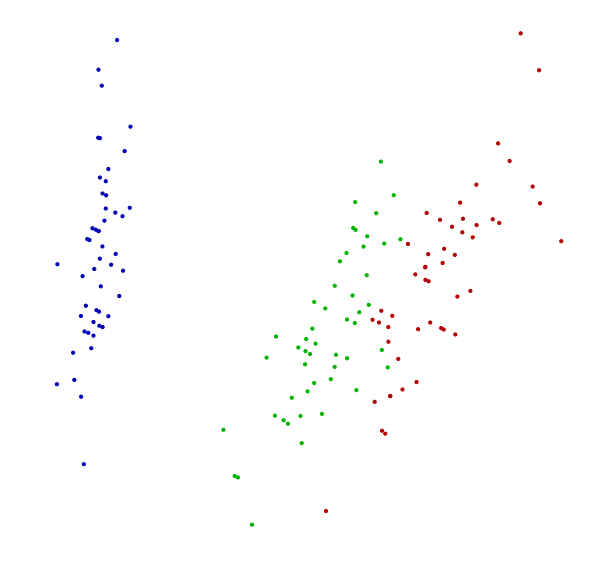

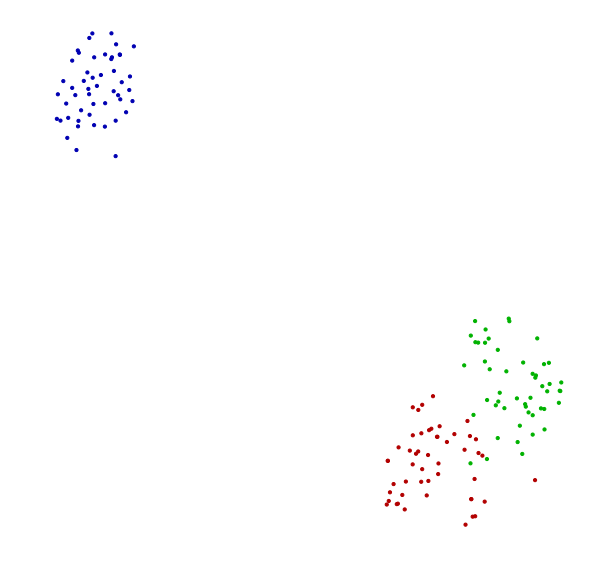

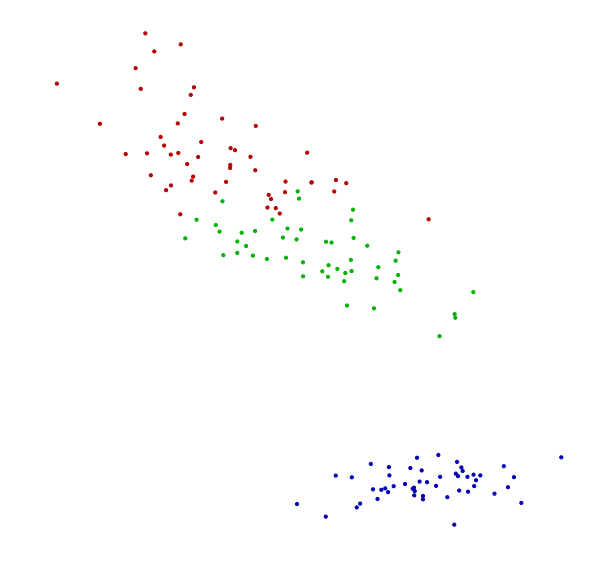

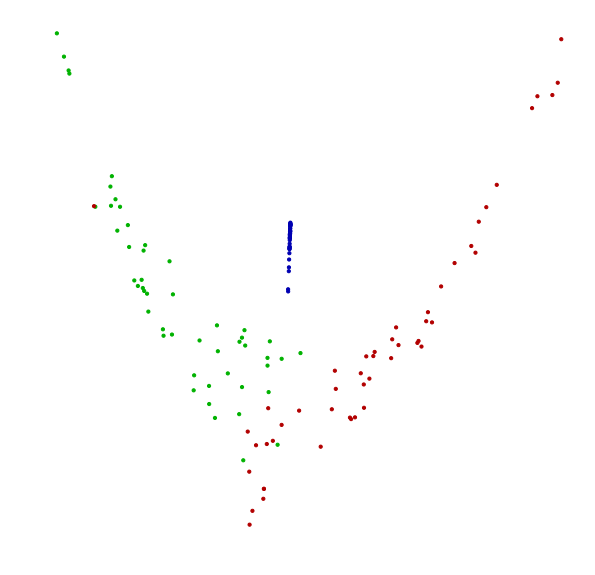

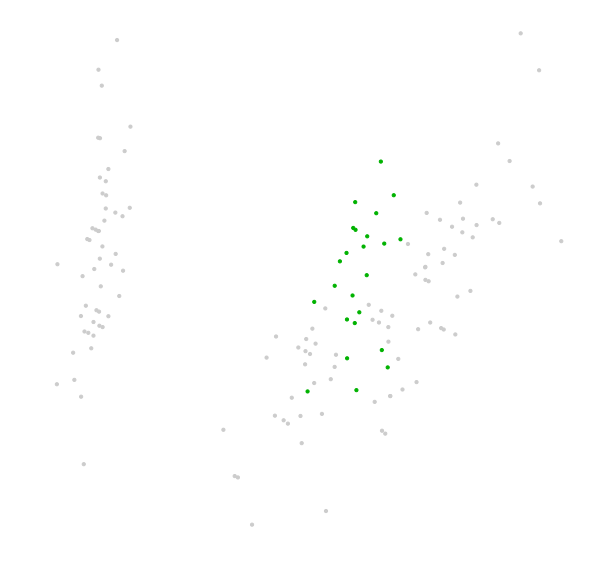

In [22]:
# ポイントクラウドの可視化

# https://www.renom.jp/ja/notebooks/product/renom_tda/how-to-show-point-cloud/notebook.html




import numpy as np

from sklearn.datasets import load_iris

from renom_tda.topology import Topology
from renom_tda.lens import PCA, TSNE, MDS, Isomap




iris = load_iris()

data = iris.data
target = iris.target

setosa = ["setosa"] * 50
versicolor = ["versicolor"] * 50
versinica = ["versinica"] * 50
species = np.array(setosa + versicolor + versinica).reshape(-1, 1)

text_data_columns = ["species"]
number_data_columns = ["sepal length", "sepal width", "petal length", "petal width"]




topology = Topology()





topology.load_data(data, number_data_columns=number_data_columns, text_data=species, text_data_columns=text_data_columns)




metric = None
lens = [PCA(components=[0, 1])]
topology.fit_transform(metric=metric, lens=lens)




topology.color_point_cloud(target, normalize=True)




topology.show_point_cloud(fig_size=(10, 10), node_size=10)




metric = None
lens = [TSNE(components=[0, 1])]
topology.fit_transform(metric=metric, lens=lens)
topology.color_point_cloud(target, normalize=True)
topology.show_point_cloud(fig_size=(10, 10), node_size=10)




metric = None
lens = [MDS(components=[0, 1])]
topology.fit_transform(metric=metric, lens=lens)
topology.color_point_cloud(target, normalize=True)
topology.show_point_cloud(fig_size=(10, 10), node_size=10)





metric = None
lens = [Isomap(components=[0, 1])]
topology.fit_transform(metric=metric, lens=lens)
topology.color_point_cloud(target, normalize=True)
topology.show_point_cloud(fig_size=(10, 10), node_size=10)





metric = None
lens = [PCA(components=[0, 1])]
topology.fit_transform(metric=metric, lens=lens)
topology.color_point_cloud(target, normalize=True)





search_dicts = [{
    "data_type": "number",
    "operator": "=",
    "column": -1,
    "value": 1
}, {
    "data_type": "number",
    "operator": ">",
    "column": 0,
    "value": 6.0
}]




node_index = topology.search_point_cloud(search_dicts=search_dicts, target=target, search_type="and")
topology.show_point_cloud(fig_size=(10, 10), node_size=10)

In [32]:
# ReNomIMGインストール
# https://www.renom.jp/packages/renomdp/ja/rsts/installation/installation.html

%cd /content/

!pip3 install folium==0.2.1, # but you'll have folium 0.8.3 which is incompatible.


#!pip3 install setuptools==41.0.0 # upgrade from  39.2.0 
!pip3 install setuptools==39.2.0 # renom-img 2.2b0 has requirement setuptools==39.2.0, but you'll have setuptools 41.0.0 which is incompatible.

#!pip3 install matplotlib==3.0.0 # but you'll have matplotlib 2.1.0 which is incompatible.
!pip3 install matplotlib==2.1.0 #ERROR: renom-img 2.2b0 has requirement matplotlib==2.1.0, but you'll have matplotlib 3.0.0 which is incompatible.


!pip3 install imgaug==0.2.5 #imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.

!pip3 install https://grid-devs.gitlab.io/ReNomIMG/bin/renom_img-2.2b0-cp36-cp36m-linux_x86_64.whl

/content
ERROR: Invalid requirement: 'folium==0.2.1,'



In [34]:
%cd /content/


!git clone https://github.com/ReNom-dev-team/ReNom.git

%cd ReNom

!python setup.py build_ext -if


  

/content
fatal: destination path 'ReNom' already exists and is not an empty directory.
/content/ReNom
running build_ext
building 'cuda_misc_a' library
nvcc --device-c -c --compiler-options -pthread,-DNDEBUG,-g,-fwrapv,-O2,-Wall,-g,-fstack-protector-strong,-Wformat,-Werror=format-security,-Wdate-time,-D_FORTIFY_SOURCE=2,-fPIC -arch=sm_30 -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c renom/cuda/thrust/thrust_funcs_float.cu -o build/temp.linux-x86_64-3.6/renom/cuda/thrust/thrust_funcs_float.o
nvcc --device-c -c --compiler-options -pthread,-DNDEBUG,-g,-fwrapv,-O2,-Wall,-g,-fstack-protector-strong,-Wformat,-Werror=format-security,-Wdate-time,-D_FORTIFY_SOURCE=2,-fPIC -arch=sm_30 -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I/usr/include/python3.6m -c renom/cuda/thrust/thrust_funcs_double.cu -o build/temp.linux-x86_64-3.6/renom/cuda/thrust/thrust_funcs_double.o
nvcc --lib --compiler-options rcs -arch=sm_30 --output-file build/temp.li

In [33]:
import os
import matplotlib.pyplot as plt
from renom_img.api.inference.detector import Detector
from renom_img.api.utility.misc.display import draw_box

ModuleNotFoundError: ignored